In [ ]:
import pickle

# open a file, where you stored the pickled data
file = open('./data/pkl/maze_prm.pkl', 'rb')
# dump information to that file
data = pickle.load(file)

# close the file
file.close()

In [ ]:
# print(data[0])
print(len(data[0]))

for t in data[0]:
    print(t)

# Basic Usage

## Evaluation

In [1]:
from eval_gnn import eval_gnn
from str2env import str2env

/home/wenjin/anaconda3/envs/gnnmp/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
pybullet build time: May 20 2022 19:44:17


In [ ]:
# evaluation on the test cases
env, indexes = str2env('maze2easy')  # choose env among ('maze2easy', 'maze2hard', 'kuka7', 'ur5', 'snake7', 'kuka13', 'kuka14')
# evaluation with GNN
_ = eval_gnn(str(env), 1234, env=env, indexes=indexes, smooth=True, use_tqdm=True)

# Advanced

## Generate New Dataset

In [6]:
from diversify_maze import find_mazes, INFINITY
import numpy as np
# generate 1000 test cases
maps, init_states, goal_states = find_mazes(10, density=[100, 150], dist2goal_threshold=1)
np.savez('maze_files/mazes_new_dataset.npz', maps=maps, goal_states=goal_states, init_states=init_states)

len of new data: 0:   0%|          | 2/10000000 [00:00<34:31:14, 80.47it/s]


## Test on New Environment

Load new environment and library

In [7]:
from tqdm import tqdm
from config import set_random_seed
from str2name import str2name
import torch
from eval_gnn import explore
from environment import MazeEnv
env = MazeEnv(dim=2, map_file='maze_files/mazes_new_dataset.npz')
indexes = range(0, 10)
bs = 100  # only sample 100 points
results = []

load model

In [8]:
_, model, model_path, model_s, model_s_path = str2name(str(env))
model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))
model_s.load_state_dict(torch.load(model_s_path, map_location=torch.device("cpu")))
model.eval()
model_s.eval()

AttributeError: 'MPNN' object has no attribute 'channels'

In [ ]:


for i in tqdm(range(1000)):
    
    env.init_new_problem(i)
    set_random_seed(1234)
    _, model, model_path, model_s, model_s_path = str2name(str(env))
    result = explore(env, model, model_s, smooth=True, smoother='none', batch=bs, t_max=bs, k=10) 
    
    results.append(result)

In [ ]:
# get the collision numbers
c_explores = [r['c_explore'] for r in results]

In [ ]:
print(results[555])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from utils.plot import plot_edges, plot_env_only
i = np.argmin(c_explores)
print(i)
env.init_new_problem(i)
edges = results[i]['data'].v[np.array(results[i]['explored_edges']).reshape(-1)].reshape(-1, 2, 2)

edges = [[tuple(k), tuple(v)] for k, v in zip(edges[:, 0, :].cpu().numpy(), edges[:, 1, :].cpu().numpy())]
plot_edges(results[i]['path'], edges, env.get_problem(), \
           title='{0:d} collision checks'.format(results[i]['c_explore']), \
           save=None)
plt.show()

In [12]:
env, indexes = str2env('maze2easy')
env.init_new_problem()

{'map': array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
        [1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
        [1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
        [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.],
        [1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
        [1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.],
        [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 

<Figure size 640x480 with 0 Axes>

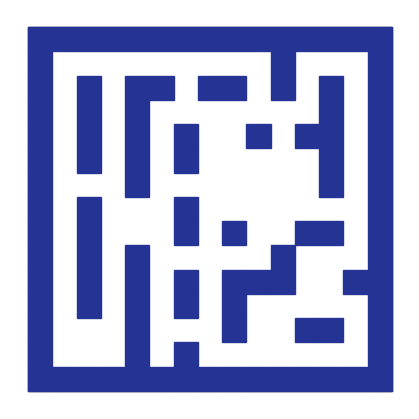

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from utils.plot import plot_edges, plot_env_only
plot_env_only(env.get_problem(), save=None)
plt.show()

In [20]:
problem = env.get_problem()
environment_map = problem["map"]
import numpy as np
print(np.transpose(environment_map))
# print(np.transpose(environment_map))
print(type(environment_map))


[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
<class 'numpy.ndarray'>


In [ ]:
i = np.argmax(c_explores)
env.init_new_problem(i)
edges = results[i]['data'].v[np.array(results[i]['explored_edges']).reshape(-1)].reshape(-1, 2, 2)
edges = [[tuple(k), tuple(v)] for k, v in zip(edges[:, 0, :].cpu().numpy(), edges[:, 1, :].cpu().numpy())]
plot_edges(results[i]['path'], edges, env.get_problem(), \
           title='{0:d} collision checks'.format(results[i]['c_explore']), \
           save=None)
plt.show()